In [295]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [296]:
train = pd.read_csv('titanic_train.csv')

In [297]:
train.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [298]:
y_train = pd.read_csv('y_titanic_train.csv')

In [299]:
y_train.head()

,Survived
0,0
1,1
2,1
3,1
4,0


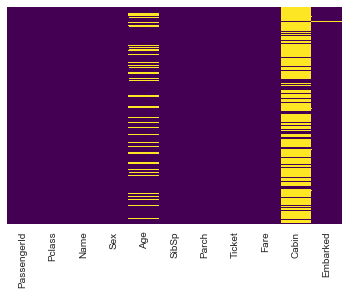

In [300]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [301]:
test = pd.read_csv('titanic_test.csv')

In [302]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


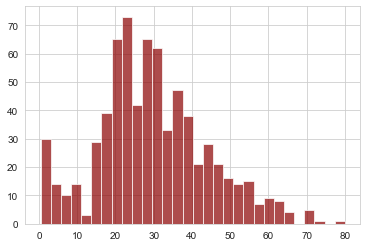

In [303]:
train['Age'].hist(bins=30,color='darkred',alpha=0.7)

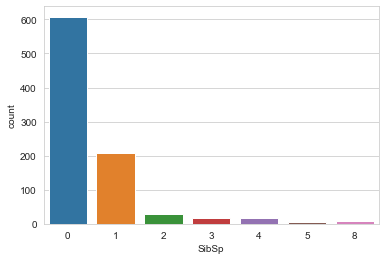

In [304]:
sns.countplot(x='SibSp',data=train)

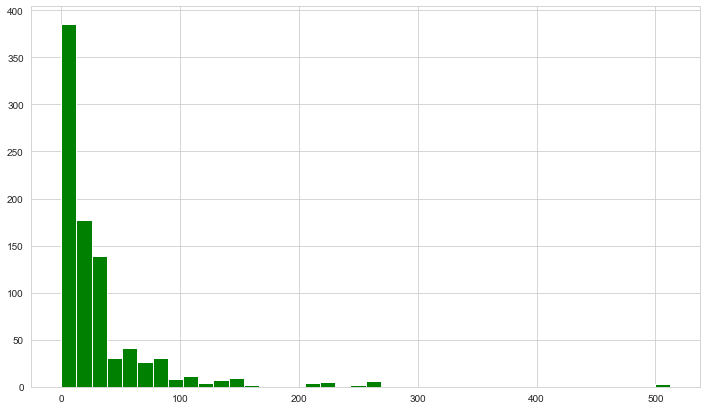

In [305]:
train['Fare'].hist(color='green',bins=40,figsize=(12,7))

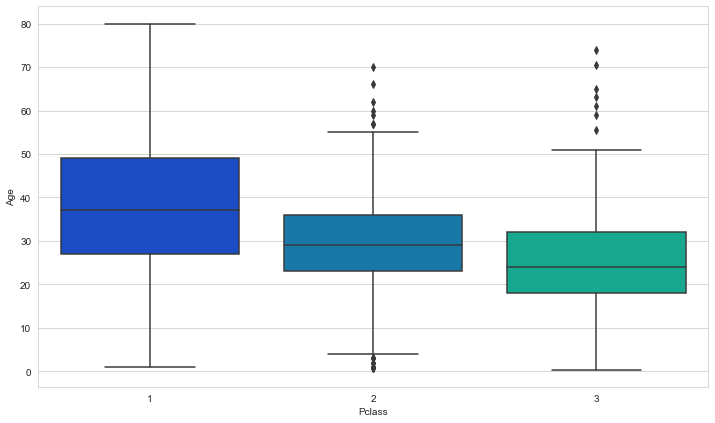

In [306]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=train,palette='winter')

In [307]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

In [308]:
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)

In [309]:
test['Age'] = test[['Age','Pclass']].apply(impute_age,axis=1)

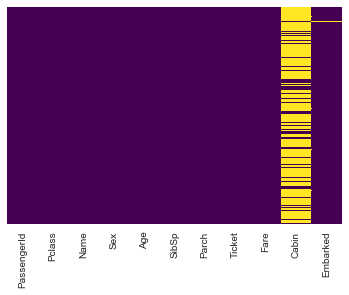

In [310]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

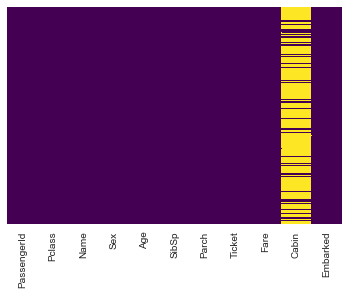

In [311]:
sns.heatmap(test.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [312]:
train.drop('Cabin',axis=1,inplace=True)

In [313]:
test.drop('Cabin',axis=1,inplace=True)

In [314]:
test['Embarked']

0      Q
1      S
2      Q
3      S
4      S
5      S
6      Q
7      S
8      C
9      S
10     S
11     S
12     S
13     S
14     S
15     C
16     Q
17     C
18     S
19     C
20     C
21     S
22     S
23     C
24     C
25     S
26     C
27     C
28     S
29     C
      ..
388    Q
389    S
390    S
391    S
392    S
393    S
394    S
395    S
396    Q
397    C
398    S
399    Q
400    S
401    S
402    C
403    S
404    C
405    C
406    S
407    C
408    Q
409    S
410    Q
411    Q
412    S
413    S
414    C
415    S
416    S
417    C
Name: Embarked, Length: 418, dtype: object

In [315]:
train.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [316]:
test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Embarked       0
dtype: int64

In [317]:
sex = pd.get_dummies(train['Sex'],drop_first=True)
embark = pd.get_dummies(train['Embarked'],drop_first=True)

In [318]:
sex_1 = pd.get_dummies(test['Sex'],drop_first=True)
embark_1 = pd.get_dummies(test['Embarked'],drop_first=True)

In [319]:
train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [320]:
test.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [321]:
X_train = pd.concat([train,sex,embark],axis=1)
X_train.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,3,22.0,1,0,7.2500,1,0,1
1,2,1,38.0,1,0,71.2833,0,0,0
2,3,3,26.0,0,0,7.9250,0,0,1
3,4,1,35.0,1,0,53.1000,0,0,1
4,5,3,35.0,0,0,8.0500,1,0,1


In [322]:
X_test=pd.concat([train,sex_1,embark_1],axis=1)
X_test.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,3,22.0,1,0,7.2500,1.0,1.0,0.0
1,2,1,38.0,1,0,71.2833,0.0,0.0,1.0
2,3,3,26.0,0,0,7.9250,1.0,1.0,0.0
3,4,1,35.0,1,0,53.1000,1.0,0.0,1.0
4,5,3,35.0,0,0,8.0500,0.0,0.0,1.0


In [323]:
X_train.count()

PassengerId    891
Pclass         891
Age            891
SibSp          891
Parch          891
Fare           891
male           891
Q              891
S              891
dtype: int64

In [324]:
X_test=X_test.interpolate()

In [325]:
from sklearn.linear_model import LogisticRegression

In [326]:
lr = LogisticRegression()
lr.fit(X_train,y_train)

H:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
H:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [327]:
y_pred = lr.predict(X_test)

In [330]:
y_pred

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,

In [332]:
pred=pd.DataFrame(y_pred)
sub_df=pd.read_csv('gender_submission.csv')
datasets=pd.concat([sub_df['PassengerId'],pred],axis=1)
datasets.columns=['PassengerId','Survived']
datasets.to_csv('gender_submission_369.csv',index=False)